In [18]:
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
X_test = pd.read_csv('../dataset/preprocessed/X_test.csv')
y_test = pd.read_csv('../dataset/preprocessed/y_test.csv').values.ravel()

In [3]:
X_train = pd.read_csv('../dataset/preprocessed/X_train_res.csv')
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[ 0.44639591,  0.46853022,  0.16227819, ..., -0.49374768,
        -0.04467595, -0.56758832],
       [-0.18382781,  0.46853022,  0.45635702, ..., -0.49374768,
        -0.04467595, -0.56758832],
       [-1.60183119,  1.37443947,  1.04451468, ..., -0.49374768,
        -0.04467595, -0.56758832],
       ...,
       [-0.97160747, -1.34328827, -1.30811597, ...,  2.0250095 ,
        -0.04467595,  1.76184035],
       [ 0.76150777, -1.34328827, -1.01403714, ...,  2.0250095 ,
        -0.04467595, -0.56758832],
       [-1.60183119, -0.43737903, -0.42587947, ..., -0.49374768,
        -0.04467595, -0.56758832]])

In [4]:
X_test_scaled = scaler.transform(X_test)

# All features

In [5]:
all_feature_model = load_model('NN_all_features.keras')

2024-12-01 22:58:44.250159: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/hice1/mphung8/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [6]:
all_feature_pred = all_feature_model.predict(X_test_scaled)
all_feature_pred = (all_feature_pred >= 0.5).astype(int)

I0000 00:00:1733111934.494964  958333 service.cc:148] XLA service 0x154e9c006ed0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733111934.495902  958333 service.cc:156]   StreamExecutor device (0): Host, Default Version
2024-12-01 22:58:54.775257: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


    132/1282580 ━━━━━━━━━━━━━━━━━━━━ 16:24 768us/step

I0000 00:00:1733111935.466398  958333 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1282580/1282580 ━━━━━━━━━━━━━━━━━━━━ 833s 648us/step


In [7]:
accuracy = accuracy_score(y_test, all_feature_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9969299661346529


In [8]:
print("Classification Report:")
print(classification_report(y_test, all_feature_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00  33525954
           1       0.99      1.00      0.99   7516590

    accuracy                           1.00  41042544
   macro avg       0.99      1.00      0.99  41042544
weighted avg       1.00      1.00      1.00  41042544



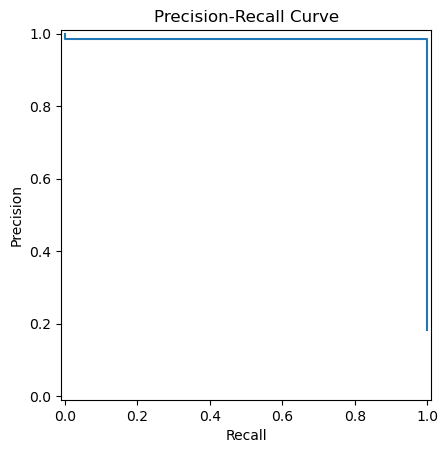

In [15]:
precision, recall, thresholds = precision_recall_curve(y_test, all_feature_pred)
display = PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot()
plt.title("Precision-Recall Curve")
plt.show()

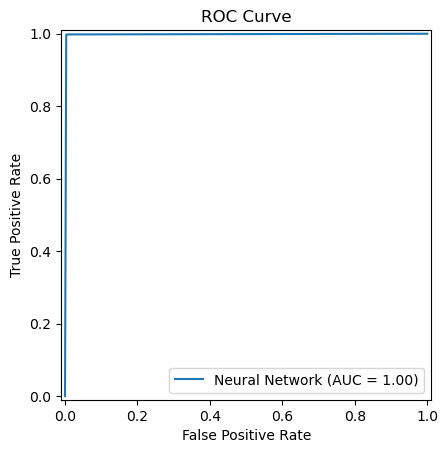

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, all_feature_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Neural Network")
display.plot()
plt.title("ROC Curve")
plt.show()

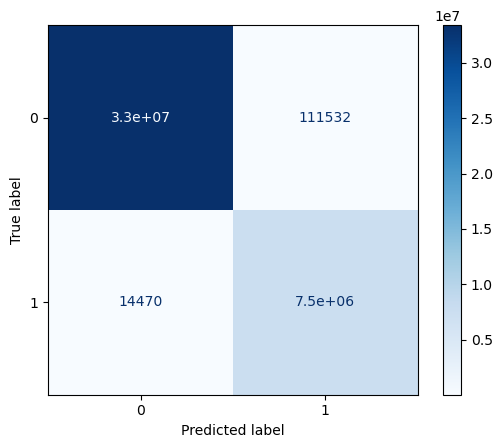

In [20]:
# Generate confusion matrix
cm = confusion_matrix(y_test, all_feature_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Chi-Square Features

In [21]:
chi_features = ['ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'CRS_DEP_TIME',
       'DEP_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'LATE_AIRCRAFT_DELAY']

In [22]:
chi_feature_model = load_model('NN_chi2.keras')

/home/hice1/mphung8/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [25]:
scaler.fit_transform(X_train[chi_features])
chi_X_test_scaled = scaler.transform(X_test[chi_features])

In [26]:
chi_feature_pred = chi_feature_model.predict(chi_X_test_scaled)
chi_feature_pred = (chi_feature_pred >= 0.5).astype(int)

1282580/1282580 ━━━━━━━━━━━━━━━━━━━━ 837s 652us/step


In [27]:
accuracy = accuracy_score(y_test, chi_feature_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9979871861744243


In [28]:
print("Classification Report:")
print(classification_report(y_test, chi_feature_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00  33525954
           1       0.99      1.00      0.99   7516590

    accuracy                           1.00  41042544
   macro avg       0.99      1.00      1.00  41042544
weighted avg       1.00      1.00      1.00  41042544



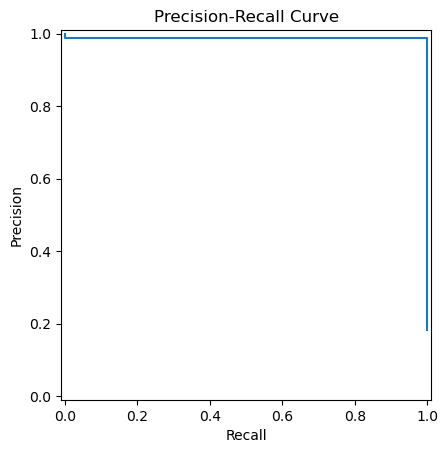

In [29]:
precision, recall, thresholds = precision_recall_curve(y_test, chi_feature_pred)
display = PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot()
plt.title("Precision-Recall Curve")
plt.show()

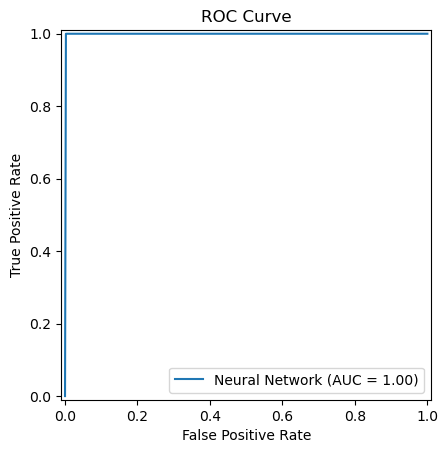

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, chi_feature_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Neural Network")
display.plot()
plt.title("ROC Curve")
plt.show()

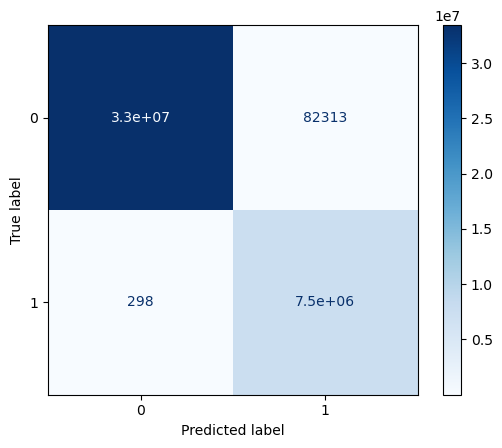

In [31]:
cm = confusion_matrix(y_test, chi_feature_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Mutual Information Features

In [32]:
mi_features = ['QUARTER', 'MONTH', 'DAY_OF_WEEK', 'CRS_DEP_TIME', 'DEP_TIME',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'LATE_AIRCRAFT_DELAY']

In [33]:
mi_feature_model = load_model('NN_mutual_info.keras')

/home/hice1/mphung8/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [34]:
scaler.fit_transform(X_train[mi_features])
mi_X_test_scaled = scaler.transform(X_test[mi_features])

In [35]:
mi_feature_pred = mi_feature_model.predict(mi_X_test_scaled)
mi_feature_pred = (mi_feature_pred >= 0.5).astype(int)

1282580/1282580 ━━━━━━━━━━━━━━━━━━━━ 847s 660us/step


In [36]:
accuracy = accuracy_score(y_test, mi_feature_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9979409902076246


In [37]:
print("Classification Report:")
print(classification_report(y_test, mi_feature_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00  33525954
           1       0.99      1.00      0.99   7516590

    accuracy                           1.00  41042544
   macro avg       0.99      1.00      1.00  41042544
weighted avg       1.00      1.00      1.00  41042544



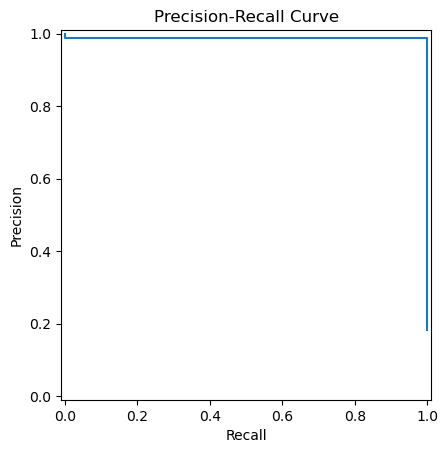

In [38]:
precision, recall, thresholds = precision_recall_curve(y_test, mi_feature_pred)
display = PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot()
plt.title("Precision-Recall Curve")
plt.show()

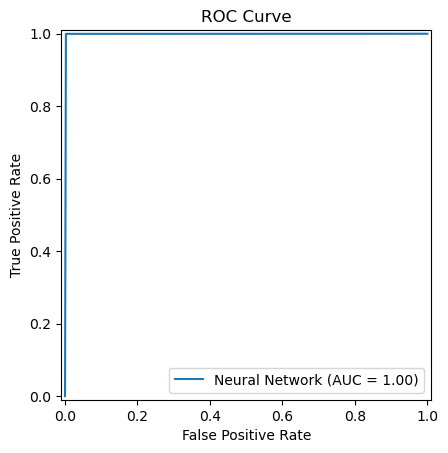

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, mi_feature_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Neural Network")
display.plot()
plt.title("ROC Curve")
plt.show()

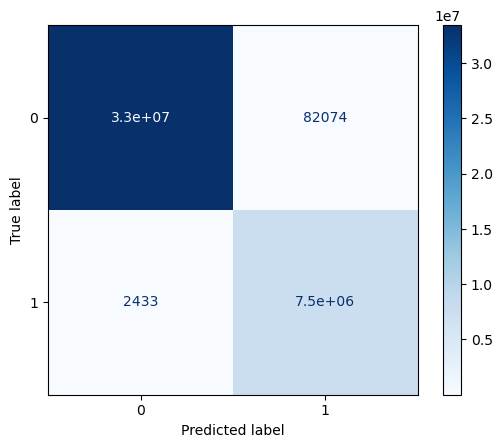

In [41]:
cm = confusion_matrix(y_test, mi_feature_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()